In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [12]:
x=np.array([0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3])
y=np.array([0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2])

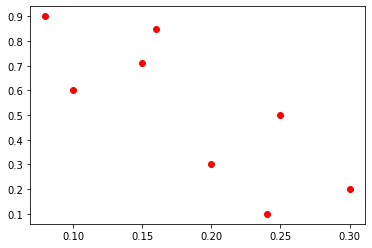

In [22]:
#data points mapped on XY axis
plt.plot(x,y,"ro")
plt.show()

In [14]:
def eucledian_distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def manhattan_distance(x1,y1,x2,y2):
    return math.fabs(x1-x2)+math.fabs(y1-y2)

In [15]:
def returnCluster(m1,m2,x_co,y_co):
    #if we use manhattan_distance then clusters are classified more correctly..
    distance1=manhattan_distance(m1[0],m1[1],x_co,y_co)
    
    distance2=manhattan_distance(m2[0],m2[1],x_co,y_co)
    
    if(distance1<distance2):
        return 1;
    else:
        return 2;
    

In [16]:
#initial centroids for cluster1 nd cluster 2
m1=[0.1,0.6]
m2=[0.3,0.2]
#difference and iteration is for controlling iteration
difference = math.inf
threshold=0.02
iteration=0;
while difference>threshold: #use any one condition #iteration one is easy
    print("Iteration ",iteration, " : m1=",m1, " m2=",m2)
    cluster1=[];
    cluster2=[];
    
    #step1 assign all points to nearest cluster
    for i in range(0,np.size(x)):
        clusterNumber=returnCluster(m1,m2,x[i],y[i])
        point=[x[i],y[i]]
        if clusterNumber==1:
            cluster1.append(point);
        else:
            cluster2.append(point)
        
    print("cluster 1", cluster1,"\nCLuster 2: ", cluster2)
    
    #step 2: Calculating new centriod for cluster1
    m1_old=m1;
    m1=[]
    m1=np.mean(cluster1, axis=0) #axis=0 means columnwise 
    
    #calculating centroid for cluster2
    m2_old=m2;
    m2=[];
    m2=np.mean(cluster2,axis=0)
    print("m1 = ",m1," m2=",m2)
    
    #adjusting diffrences of adjustment between m1 nd m1_old
    xAvg=0.0;
    yAvg=0.0;
    xAvg=math.fabs(m1[0]-m1_old[0])+math.fabs(m2[0]-m2_old[0])
    xAvg=xAvg/2;
    
    yAvg=math.fabs(m1[1]-m1_old[1])+math.fabs(m2[1]-m2_old[1])
    yAvg=yAvg/2;
    
    if(xAvg>yAvg):
        difference=xAvg;
    else:
        difference=yAvg;
        
    print("Difference  : ", difference)
    iteration+=1;
    print("")
    

Iteration  0  : m1= [0.1, 0.6]  m2= [0.3, 0.2]
cluster 1 [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.25, 0.5]] 
CLuster 2:  [[0.2, 0.3], [0.24, 0.1], [0.3, 0.2]]
m1 =  [0.148 0.712]  m2= [0.24666667 0.2       ]
Difference  :  0.05600000000000001

Iteration  1  : m1= [0.148 0.712]  m2= [0.24666667 0.2       ]
cluster 1 [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85]] 
CLuster 2:  [[0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]
m1 =  [0.1225 0.765 ]  m2= [0.2475 0.275 ]
Difference  :  0.06400000000000002

Iteration  2  : m1= [0.1225 0.765 ]  m2= [0.2475 0.275 ]
cluster 1 [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85]] 
CLuster 2:  [[0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]
m1 =  [0.1225 0.765 ]  m2= [0.2475 0.275 ]
Difference  :  0.0



Cluster 1 centroid : m1 =  [0.1225 0.765 ]
CLuster 1 points:  [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85]]
Cluster 2 centroid : m2 =  [0.2475 0.275 ]
CLuster 2 points:  [[0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]


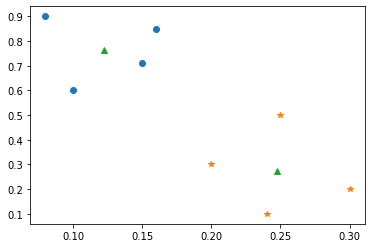

In [17]:
#final Output
print("Cluster 1 centroid : m1 = ",m1)
print("CLuster 1 points: ", cluster1)
print("Cluster 2 centroid : m2 = ",m2)
print("CLuster 2 points: ", cluster2)

clust1=np.array(cluster1)
clust2=np.array(cluster2)

#cluster 1 points
plt.plot(clust1[:,0],clust1[:,1],"o")

#cluster2 points
plt.plot(clust2[:,0], clust2[:,1],"*")

#centroids
plt.plot([m1[0],m2[0]],[m1[1],m2[1]],"^")
plt.show()

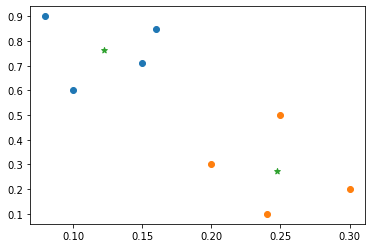

In [18]:
#same code
plt.scatter(clust1[:,0],clust1[:,1])
plt.scatter(clust2[:,0],clust2[:,1])
plt.scatter([m1[0],m2[0]],[m1[1],m2[1]],marker="*")
plt.show()